In [1]:
from src.env import FourRoomEnvWithTagging, Action, FourRoomEnv, IMPOSTER_ACTIONS, CREW_ACTIONS 

In [2]:
m = FourRoomEnvWithTagging(n_imposters=1, n_crew=4, n_jobs=5)

In [10]:
state, _ = m.reset()
state

([(3, 0), (0, 1), (2, 7), (5, 3), (6, 8)],
 [(5, 8), (2, 2), (3, 1), (3, 3), (8, 5)],
 array([0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 10)

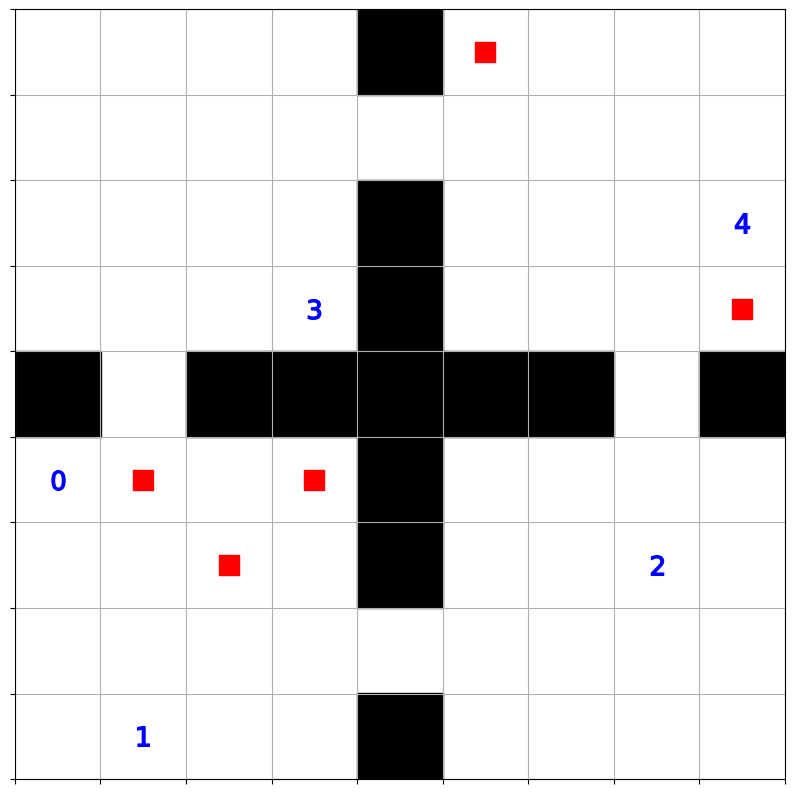

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_state(env, state):
    agent_positions = state[0]
    job_positions = state[1]
    rows, cols = env.n_rows, env.n_cols

    # Define the plot
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1, cols-1)
    plt.ylim(-1, rows-1)
    # set tick labels to empty
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    

    # programatically generate the markers for the agents
    agent_markers = [f"${i}$" for i in range(len(agent_positions))]

    for idx, position in enumerate(agent_positions):
        plt.scatter(position[1] - 0.5, position[0] - 0.5, s=200, marker=agent_markers[idx % len(agent_markers)], color='blue', label=f'Agent {idx+1}' if idx==0 else "")

    # Plot job positions with a consistent marker
    for position in job_positions:
        plt.scatter(position[1] - 0.5, position[0] - 0.5, s=200, marker='s', color='red', label='Job' if position == job_positions[0] else "")
    
    # Plot walls
    for row, col in env.walls:
        plt.scatter(col-0.5, row-0.5, s=3800, marker='s', color='black', label='Wall' if (row, col) == env.walls[0] else "")

    wall_row, wall_col = np.where(env.walls)

    # Show plot
    plt.show()

visualize_state(m, state)


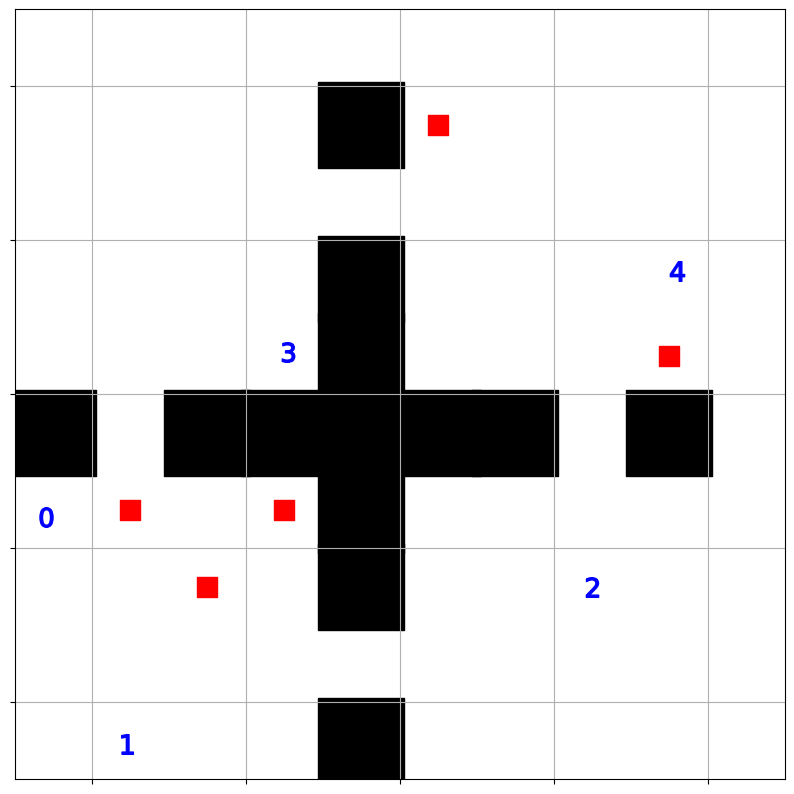

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_state(env, state):
    agent_positions = state[0]
    job_positions = state[1]
    job_status = state[2]  # Assuming this contains boolean values for job completion
    agent_status = state[3]  # Assuming this contains boolean values for alive status
    rows, cols = env.n_rows, env.n_cols

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1, cols)
    ax.set_ylim(-1, rows)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Handling agent overlap by slight offsetting
    position_offsets = np.linspace(-0.1, 0.1, len(agent_positions))

    for idx, (position, offset) in enumerate(zip(agent_positions, position_offsets)):
        x, y = position[1] - 0.5 + offset, position[0] - 0.5 + offset
        color = 'gray' if not agent_status[idx] else 'blue'
        marker = 'X' if not agent_status[idx] else f"${idx}$"
        ax.scatter(x, y, s=200, marker=marker, color=color, label=f'Agent {idx+1}' if idx==0 else "")

    # Plot job positions with different markers for completion status
    for idx, position in enumerate(job_positions):
        color = 'green' if job_status[idx] else 'red'
        marker = 'o' if job_status[idx] else 's'
        ax.scatter(position[1] - 0.5, position[0] - 0.5, s=200, marker=marker, color=color, label='Completed Job' if job_status[idx] and idx==0 else 'Job')

    # Plot walls using large filled squares
    for row, col in env.walls:
        ax.scatter(col-0.5, row-0.5, s=3800, marker='s', color='black', label='Wall' if (row, col) == env.walls[0] else "")

    # Adding a legend only once
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.show()

# Assuming `m`, `state`, and the relevant attributes (env.walls, etc.) are defined
visualize_state(m, state)
